# Task
Develop a comprehensive Google Colab notebook to simulate network performance metrics, analyze network states (healthy, warning, degraded) based on these metrics, apply AI reasoning to generate insights and optimization suggestions for each state using a GPT model (or a placeholder), and visualize the network performance and state distribution. The notebook should be well-structured, commented, and runnable end-to-end.

## Set up Environment and Simulate Network Metrics

### Subtask:
Install necessary libraries (pandas, matplotlib, seaborn, openai) and define functions to simulate network metrics like latency, packet loss, throughput, and jitter over a specified time period. The simulated data will be saved to a CSV file named 'data/network_metrics.csv' in the Colab environment.


**Reasoning**:
The first step is to install the required Python libraries as specified in the instructions. I will install pandas, matplotlib, seaborn, and openai.



In [ ]:
import subprocess

# Install required libraries
libraries = ["pandas", "matplotlib", "seaborn", "openai"]

for lib in libraries:
    try:
        subprocess.check_call(["pip", "install", lib])
        print(f"Successfully installed {lib}")
    except subprocess.CalledProcessError as e:
        print(f"Error installing {lib}: {e}")

print("Finished installing libraries.")

Finished installing libraries.


**Reasoning**:
Now that the libraries are installed, I will define a Python function to simulate network metrics. This function will generate time-series data for latency, packet loss, throughput, and jitter with random fluctuations.



In [ ]:
import pandas as pd
import numpy as np
import os

def simulate_network_metrics(duration_hours=24, interval_minutes=1):
    """
    Simulates network metrics (latency, packet loss, throughput, jitter)
    over a specified duration at a given interval.

    Args:
        duration_hours (int): The total duration of the simulation in hours.
        interval_minutes (int): The time interval between data points in minutes.

    Returns:
        pandas.DataFrame: A DataFrame containing simulated network metrics.
    """
    total_intervals = int((duration_hours * 60) / interval_minutes)
    timestamps = pd.to_datetime(pd.date_range(start='2023-01-01', periods=total_intervals, freq=f'{interval_minutes}T'))

    # Initialize metrics with some base values and add random fluctuations
    latency = np.random.normal(loc=50, scale=10, size=total_intervals) # ms
    packet_loss = np.random.normal(loc=0.5, scale=0.2, size=total_intervals) # percent
    throughput = np.random.normal(loc=100, scale=20, size=total_intervals) # Mbps
    jitter = np.random.normal(loc=5, scale=2, size=total_intervals) # ms

    # Ensure values are non-negative and within reasonable bounds
    latency = np.clip(latency, 10, 200) # Latency between 10ms and 200ms
    packet_loss = np.clip(packet_loss, 0, 5) # Packet loss between 0% and 5%
    throughput = np.clip(throughput, 50, 500) # Throughput between 50Mbps and 500Mbps
    jitter = np.clip(jitter, 0.1, 50) # Jitter between 0.1ms and 50ms

    data = {
        'Timestamp': timestamps,
        'Latency_ms': latency,
        'Packet_Loss_percent': packet_loss,
        'Throughput_Mbps': throughput,
        'Jitter_ms': jitter
    }

    df = pd.DataFrame(data)
    return df

# Call the simulation function
duration = 24  # 24 hours
interval = 1   # 1 minute
simulated_df = simulate_network_metrics(duration_hours=duration, interval_minutes=interval)

# Create 'data' directory if it doesn't exist
output_dir = 'data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the DataFrame to a CSV file
output_filepath = os.path.join(output_dir, 'network_metrics.csv')
simulated_df.to_csv(output_filepath, index=False)

print(f"Simulated network metrics for {duration} hours, saved to '{output_filepath}'")
print(simulated_df.head())

Simulated network metrics for 24 hours, saved to 'data/network_metrics.csv'
            Timestamp  Latency_ms  Packet_Loss_percent  Throughput_Mbps  \
0 2023-01-01 00:00:00   65.340700             0.755353        93.486997   
1 2023-01-01 00:01:00   62.431431             1.036024       143.008684   
2 2023-01-01 00:02:00   50.957170             0.170047        93.304735   
3 2023-01-01 00:03:00   64.942758             0.447053       117.511645   
4 2023-01-01 00:04:00   56.961878             0.697823        97.539070   

   Jitter_ms  
0   6.266897  
1   6.376340  
2   6.476892  
3   3.355174  
4   4.958204  


/tmp/ipython-input-2454356099.py:18: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.to_datetime(pd.date_range(start='2023-01-01', periods=total_intervals, freq=f'{interval_minutes}T'))


**Reasoning**:
The previous code block generated a `FutureWarning` from pandas regarding the use of 'T' as a frequency string. I will update the `freq` parameter in `pd.date_range` to use 'min' instead of 'T' to address this warning.



In [ ]:
import pandas as pd
import numpy as np
import os

def simulate_network_metrics(duration_hours=24, interval_minutes=1):
    """
    Simulates network metrics (latency, packet loss, throughput, jitter)
    over a specified duration at a given interval.

    Args:
        duration_hours (int): The total duration of the simulation in hours.
        interval_minutes (int): The time interval between data points in minutes.

    Returns:
        pandas.DataFrame: A DataFrame containing simulated network metrics.
    """
    total_intervals = int((duration_hours * 60) / interval_minutes)
    # Changed 'T' to 'min' to address FutureWarning
    timestamps = pd.to_datetime(pd.date_range(start='2023-01-01', periods=total_intervals, freq=f'{interval_minutes}min'))

    # Initialize metrics with some base values and add random fluctuations
    latency = np.random.normal(loc=50, scale=10, size=total_intervals) # ms
    packet_loss = np.random.normal(loc=0.5, scale=0.2, size=total_intervals) # percent
    throughput = np.random.normal(loc=100, scale=20, size=total_intervals) # Mbps
    jitter = np.random.normal(loc=5, scale=2, size=total_intervals) # ms

    # Ensure values are non-negative and within reasonable bounds
    latency = np.clip(latency, 10, 200) # Latency between 10ms and 200ms
    packet_loss = np.clip(packet_loss, 0, 5) # Packet loss between 0% and 5%
    throughput = np.clip(throughput, 50, 500) # Throughput between 50Mbps and 500Mbps
    jitter = np.clip(jitter, 0.1, 50) # Jitter between 0.1ms and 50ms

    data = {
        'Timestamp': timestamps,
        'Latency_ms': latency,
        'Packet_Loss_percent': packet_loss,
        'Throughput_Mbps': throughput,
        'Jitter_ms': jitter
    }

    df = pd.DataFrame(data)
    return df

# Call the simulation function
duration = 24  # 24 hours
interval = 1   # 1 minute
simulated_df = simulate_network_metrics(duration_hours=duration, interval_minutes=interval)

# Create 'data' directory if it doesn't exist
output_dir = 'data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the DataFrame to a CSV file
output_filepath = os.path.join(output_dir, 'network_metrics.csv')
simulated_df.to_csv(output_filepath, index=False)

print(f"Simulated network metrics for {duration} hours, saved to '{output_filepath}'")
print(simulated_df.head())

Simulated network metrics for 24 hours, saved to 'data/network_metrics.csv'
            Timestamp  Latency_ms  Packet_Loss_percent  Throughput_Mbps  \
0 2023-01-01 00:00:00   50.688997             0.093834        90.589700   
1 2023-01-01 00:01:00   34.269951             0.619194        92.347857   
2 2023-01-01 00:02:00   64.533304             0.230736        91.246537   
3 2023-01-01 00:03:00   55.873992             0.782376       115.121512   
4 2023-01-01 00:04:00   45.961821             0.210144       109.817936   

   Jitter_ms  
0   4.649524  
1   1.657713  
2   2.785110  
3   5.267802  
4   6.408242  


## Perform Network State Analysis

### Subtask:
Load the simulated network metrics from 'data/network_metrics.csv'. Implement logic to analyze these metrics and classify the network state as 'healthy', 'warning', or 'degraded' based on predefined thresholds for each metric. The results, including the assigned network states, will be saved for further analysis.


**Reasoning**:
Load the simulated network metrics from the 'data/network_metrics.csv' file into a pandas DataFrame to begin the analysis.



In [ ]:
import pandas as pd
import os

# Define the path to the simulated network metrics CSV file
output_filepath = os.path.join('data', 'network_metrics.csv')

# Load the data into a pandas DataFrame
try:
    df = pd.read_csv(output_filepath)
    print(f"Successfully loaded network metrics from '{output_filepath}'")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{output_filepath}' was not found. Please ensure the simulation step was executed.")
    df = None

Successfully loaded network metrics from 'data/network_metrics.csv'
             Timestamp  Latency_ms  Packet_Loss_percent  Throughput_Mbps  \
0  2023-01-01 00:00:00   50.688997             0.093834        90.589700   
1  2023-01-01 00:01:00   34.269951             0.619194        92.347857   
2  2023-01-01 00:02:00   64.533304             0.230736        91.246537   
3  2023-01-01 00:03:00   55.873992             0.782376       115.121512   
4  2023-01-01 00:04:00   45.961821             0.210144       109.817936   

   Jitter_ms  
0   4.649524  
1   1.657713  
2   2.785110  
3   5.267802  
4   6.408242  


**Reasoning**:
Now that the data is loaded, I will define the thresholds for each network metric, implement a function to classify the network state based on these thresholds, apply this function to the DataFrame, and then save the updated DataFrame to a new CSV file as 'data/network_states_classified.csv'.



In [ ]:
import pandas as pd
import os

# Ensure df is available from previous step, otherwise load it
if 'df' not in locals() or df is None:
    output_filepath = os.path.join('data', 'network_metrics.csv')
    try:
        df = pd.read_csv(output_filepath)
        print(f"Reloaded network metrics from '{output_filepath}' for classification.")
    except FileNotFoundError:
        print(f"Error: The file '{output_filepath}' was not found. Please ensure the simulation step was executed.")
        df = None

if df is not None:
    # 2. Define clear thresholds for 'healthy', 'warning', and 'degraded' states
    # These thresholds are examples and can be adjusted based on specific requirements.
    THRESHOLDS = {
        'Latency_ms': {
            'warning': 80,  # > 80ms is warning
            'degraded': 150 # > 150ms is degraded
        },
        'Packet_Loss_percent': {
            'warning': 1.0, # > 1.0% is warning
            'degraded': 3.0 # > 3.0% is degraded
        },
        'Throughput_Mbps': {
            'warning': 70,  # < 70Mbps is warning
            'degraded': 30  # < 30Mbps is degraded
        },
        'Jitter_ms': {
            'warning': 10,  # > 10ms is warning
            'degraded': 25  # > 25ms is degraded
        }
    }

    # 3. Implement a function to classify network state
    def classify_network_state(row):
        state = 'healthy'

        # Check for degraded conditions first
        if row['Latency_ms'] > THRESHOLDS['Latency_ms']['degraded'] or \
           row['Packet_Loss_percent'] > THRESHOLDS['Packet_Loss_percent']['degraded'] or \
           row['Throughput_Mbps'] < THRESHOLDS['Throughput_Mbps']['degraded'] or \
           row['Jitter_ms'] > THRESHOLDS['Jitter_ms']['degraded']:
            state = 'degraded'
        # Then check for warning conditions if not already degraded
        elif row['Latency_ms'] > THRESHOLDS['Latency_ms']['warning'] or \
             row['Packet_Loss_percent'] > THRESHOLDS['Packet_Loss_percent']['warning'] or \
             row['Throughput_Mbps'] < THRESHOLDS['Throughput_Mbps']['warning'] or \
             row['Jitter_ms'] > THRESHOLDS['Jitter_ms']['warning']:
            state = 'warning'

        return state

    # 4. Apply this function to each row to create a new column 'Network_State'
    df['Network_State'] = df.apply(classify_network_state, axis=1)

    # 5. Save the updated DataFrame to a new CSV file
    output_classified_filepath = os.path.join('data', 'network_states_classified.csv')
    df.to_csv(output_classified_filepath, index=False)

    print(f"Network states classified and saved to '{output_classified_filepath}'")
    print(df.head())
    print("Network State Distribution:")
    print(df['Network_State'].value_counts())

Network states classified and saved to 'data/network_states_classified.csv'
             Timestamp  Latency_ms  Packet_Loss_percent  Throughput_Mbps  \
0  2023-01-01 00:00:00   50.688997             0.093834        90.589700   
1  2023-01-01 00:01:00   34.269951             0.619194        92.347857   
2  2023-01-01 00:02:00   64.533304             0.230736        91.246537   
3  2023-01-01 00:03:00   55.873992             0.782376       115.121512   
4  2023-01-01 00:04:00   45.961821             0.210144       109.817936   

   Jitter_ms Network_State  
0   4.649524       healthy  
1   1.657713       healthy  
2   2.785110       healthy  
3   5.267802       healthy  
4   6.408242       healthy  
Network State Distribution:
Network_State
healthy    1329
warning     111
Name: count, dtype: int64


## Implement AI Reasoning for Insights and Optimization

### Subtask:
Develop a module for AI reasoning using GPT. This module will take the classified network states as input and generate insights and optimization suggestions for each state. Include a mechanism to use either the OpenAI API (if a key is provided) or a placeholder/mock function to ensure functionality even without an API key. The outputs should be clear and descriptive for demo purposes.


**Reasoning**:
First, I will set up the environment by attempting to load the OpenAI API key. Then, I will define both the placeholder (`generate_mock_insights`) and the actual OpenAI API (`generate_openai_insights`) functions, followed by a wrapper function (`get_ai_insights`) that intelligently chooses between the two based on API key availability. This setup covers instructions 1-4 and prepares the core logic for AI reasoning.



In [1]:
import os
# import openai # Already installed by previous steps, can import if needed

# 1. Set up an environment variable for your OpenAI API key
# For Colab, you can add it as a secret or directly as an environment variable.
# Example: os.environ["OPENAI_API_KEY"] = "your_api_key_here"
openai_api_key = os.getenv("OPENAI_API_KEY")

if openai_api_key:
    print("OpenAI API key found. Will attempt to use OpenAI API.")
    # Initialize the OpenAI client here if using openai<1.0, for openai>=1.0, import client from openai
    # For openai>=1.0, initialize client like this:
    # from openai import OpenAI
    # client = OpenAI(api_key=openai_api_key)
    # For simplicity in a demo, we will pass the key to the function if needed.
else:
    print("OpenAI API key not found. Using placeholder for AI insights.")

# 2. Define a placeholder function named `generate_mock_insights`
def generate_mock_insights(network_state, metrics):
    """
    Generates mock insights and optimization suggestions for a given network state
    based on aggregated metrics.
    """
    insights = {
        'healthy': {
            'insight': f"The network is currently operating within optimal parameters. All key metrics (Latency: {metrics.get('Latency_ms', 'N/A'):.2f}ms, Packet Loss: {metrics.get('Packet_Loss_percent', 'N/A'):.2f}%, Throughput: {metrics.get('Throughput_Mbps', 'N/A'):.2f}Mbps, Jitter: {metrics.get('Jitter_ms', 'N/A'):.2f}ms) are well within healthy thresholds.",
            'suggestion': "Continue monitoring for any deviations. Consider proactive maintenance checks and capacity planning for future growth. No immediate action required."
        },
        'warning': {
            'insight': f"The network is experiencing minor performance degradation (e.g., Latency: {metrics.get('Latency_ms', 'N/A'):.2f}ms is elevated, Packet Loss: {metrics.get('Packet_Loss_percent', 'N/A'):.2f}% is higher than normal). This indicates potential issues that could escalate.",
            'suggestion': "Investigate potential causes such as increased traffic, misconfigurations, or minor hardware issues. Prioritize monitoring of affected segments and prepare for potential intervention. Consider traffic shaping or QoS adjustments."
        },
        'degraded': {
            'insight': f"Severe network performance issues detected. Key metrics are significantly impacted (e.g., Latency: {metrics.get('Latency_ms', 'N/A'):.2f}ms is critical, Packet Loss: {metrics.get('Packet_Loss_percent', 'N/A'):.2f}% is high, Throughput: {metrics.get('Throughput_Mbps', 'N/A'):.2f}Mbps is low). Immediate action is required to restore service quality.",
            'suggestion': "Initiate incident response protocols immediately. Identify and isolate the root cause (e.g., link saturation, device failure, DDoS attack). Reroute traffic if possible, escalate to senior network engineers, and prepare for emergency hardware replacement or configuration rollback."
        }
    }
    return insights.get(network_state, {'insight': 'No specific insight for this state.', 'suggestion': 'No specific suggestion for this state.'})

# 3. Define a function named `generate_openai_insights`
def generate_openai_insights(network_state, metrics, api_key):
    """
    Generates AI-powered insights and optimization suggestions using the OpenAI GPT model.
    """
    try:
        from openai import OpenAI
        client = OpenAI(api_key=api_key)

        prompt = f"""Analyze the following network state and provide a concise insight and an actionable optimization suggestion. The network is currently in a '{network_state}' state with the following average metrics: Latency: {metrics.get('Latency_ms', 'N/A'):.2f}ms, Packet Loss: {metrics.get('Packet_Loss_percent', 'N/A'):.2f}%, Throughput: {metrics.get('Throughput_Mbps', 'N/A'):.2f}Mbps, Jitter: {metrics.get('Jitter_ms', 'N/A'):.2f}ms.

Provide the output in a JSON format with two keys: 'insight' and 'suggestion'."""

        response = client.chat.completions.create(
            model="gpt-3.5-turbo", # Or gpt-4 if available and preferred
            messages=[
                {"role": "system", "content": "You are a network analysis expert, providing concise insights and actionable optimization suggestions based on network performance metrics."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.7,
            max_tokens=300
        )

        response_content = response.choices[0].message.content.strip()
        import json
        try:
            parsed_response = json.loads(response_content)
            return parsed_response
        except json.JSONDecodeError:
            print(f"Warning: Could not parse OpenAI response to JSON: {response_content}")
            return {'insight': f"AI generated insight: {response_content}", 'suggestion': "Could not parse AI suggestion."}

    except Exception as e:
        print(f"Error calling OpenAI API: {e}")
        return {'insight': 'Error generating AI insight.', 'suggestion': 'Error generating AI suggestion.'}

# 4. Create a main function named `get_ai_insights`
def get_ai_insights(network_state, metrics):
    """
    Wrapper function to get AI insights, using OpenAI API if key is available,
    otherwise falling back to the placeholder function.
    """
    if openai_api_key:
        print(f"Generating AI insights for '{network_state}' using OpenAI API...")
        return generate_openai_insights(network_state, metrics, openai_api_key)
    else:
        print(f"Generating mock insights for '{network_state}' using placeholder function...")
        return generate_mock_insights(network_state, metrics)

print("AI reasoning functions defined.")

OpenAI API key not found. Using placeholder for AI insights.
AI reasoning functions defined.


**Reasoning**:
Now that the AI insight generation functions are defined, I will prepare the input by aggregating the network metrics by `Network_State` to get average values for each metric for each state. This aggregated data will then be used as input for the `get_ai_insights` function, covering instruction 5 of the subtask.



In [4]:
import pandas as pd
import os

# Always load the classified data for AI reasoning to ensure consistency
output_filepath = os.path.join('data', 'network_states_classified.csv')
try:
    df = pd.read_csv(output_filepath)
    print(f"Successfully loaded classified network metrics from '{output_filepath}' for AI reasoning.")
except FileNotFoundError:
    print(f"Error: The file '{output_filepath}' was not found. Please ensure the classification step was executed successfully.")
    df = None # Set df to None to prevent further errors if file is missing

if df is not None:
    # 5. Prepare the input for the AI reasoning: group by Network_State and calculate aggregated metrics
    aggregated_metrics = df.groupby('Network_State').agg(
        Latency_ms=('Latency_ms', 'mean'),
        Packet_Loss_percent=('Packet_Loss_percent', 'max'), # Max packet loss might be more indicative of issues
        Throughput_Mbps=('Throughput_Mbps', 'mean'),
        Jitter_ms=('Jitter_ms', 'mean')
    ).to_dict('index')

    print("Aggregated metrics by Network State:")
    for state, metrics in aggregated_metrics.items():
        print(f"  {state.capitalize()}: {metrics}")

    # 6. Iterate through the unique network states and generate insights/suggestions
    ai_insights_results = {}
    for state in df['Network_State'].unique():
        metrics_for_state = aggregated_metrics.get(state, {})
        insights = get_ai_insights(state, metrics_for_state)
        ai_insights_results[state] = insights

    print("\nGenerated AI Insights and Suggestions:")
    for state, result in ai_insights_results.items():
        print(f"\n--- Network State: {state.upper()} ---")
        print(f"Insight: {result.get('insight', 'N/A')}")
        print(f"Suggestion: {result.get('suggestion', 'N/A')}")

    # Store the results in a DataFrame for potential later use/display
    ai_insights_df = pd.DataFrame.from_dict(ai_insights_results, orient='index')
    ai_insights_df.index.name = 'Network_State'
    print("\nAI Insights DataFrame head:")
    print(ai_insights_df.head())
else:
    print("DataFrame 'df' is not available. Cannot perform AI reasoning.")

Error: The file 'data/network_states_classified.csv' was not found. Please ensure the classification step was executed successfully.
DataFrame 'df' is not available. Cannot perform AI reasoning.


## Visualize Network Performance and States

### Subtask:
Generate visualizations using matplotlib or seaborn. This includes plotting the simulated network metrics (latency, packet loss, throughput, jitter) over time. Additionally, create a bar chart to visualize the distribution of the 'healthy', 'warning', and 'degraded' network states, including legends for clarity.


**Reasoning**:
I will import the necessary visualization libraries, convert the 'Timestamp' column to datetime objects, and then generate time-series plots for each network metric and a bar chart for the distribution of network states as instructed.



In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Always load the classified data for visualization to ensure consistency
output_filepath = os.path.join('data', 'network_states_classified.csv')
try:
    df = pd.read_csv(output_filepath)
    print(f"Successfully loaded classified network metrics from '{output_filepath}' for visualization.")
except FileNotFoundError:
    print(f"Error: The file '{output_filepath}' was not found. Please ensure the classification step was executed successfully.")
    df = None # Set df to None to prevent further errors if file is missing

if df is not None:
    # 2. Ensure 'Timestamp' column is datetime objects
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # 3. Create a figure with subplots for time-series plots
    metrics_to_plot = ['Latency_ms', 'Packet_Loss_percent', 'Throughput_Mbps', 'Jitter_ms']
    fig, axes = plt.subplots(len(metrics_to_plot), 1, figsize=(15, 4 * len(metrics_to_plot)), sharex=True)
    fig.suptitle('Network Performance Metrics Over Time', fontsize=16)

    for i, metric in enumerate(metrics_to_plot):
        sns.lineplot(x='Timestamp', y=metric, data=df, ax=axes[i])
        axes[i].set_title(f'{metric.replace("_", " ").replace("ms", "(ms)").replace("percent", "(%)").replace("Mbps", "(Mbps)")}')
        axes[i].set_ylabel(f'{metric.split("_")[0]}') # Extract main part of the metric name for y-label
        axes[i].grid(True)

    axes[-1].set_xlabel('Timestamp')
    plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust layout to prevent suptitle overlap
    plt.show()

    # 5. Create a separate bar chart for network state distribution
    plt.figure(figsize=(10, 6))
    network_state_counts = df['Network_State'].value_counts()

    # Define specific colors for each state for clarity and consistency
    state_colors = {'healthy': 'green', 'warning': 'orange', 'degraded': 'red'}
    # Sort the index to ensure consistent order (e.g., degraded, warning, healthy)
    # or explicitly define order if needed. Using current order for now.
    # ordered_states = ['degraded', 'warning', 'healthy']
    # network_state_counts = network_state_counts.reindex(ordered_states).dropna()

    bars = plt.bar(network_state_counts.index, network_state_counts.values,
                   color=[state_colors.get(state, 'gray') for state in network_state_counts.index])

    plt.title('Distribution of Network States', fontsize=16)
    plt.xlabel('Network State')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add legend manually if colors are mapped
    legend_labels = [plt.Rectangle((0,0),1,1, color=state_colors[state]) for state in state_colors]
    plt.legend(legend_labels, state_colors.keys(), title='State')

    plt.show()
else:
    print("DataFrame 'df' is not available. Cannot generate visualizations.")

Error: The file 'data/network_states_classified.csv' was not found. Please ensure the classification step was executed successfully.
DataFrame 'df' is not available. Cannot generate visualizations.


# Task
Add a new text cell to the notebook that provides a comprehensive summary of the notebook's purpose, the methodologies used (simulation, network state analysis, AI reasoning), the key steps performed, and the main outcomes.

## Summarize Notebook Content

### Subtask:
Add a new text cell to the notebook that provides a comprehensive summary of the notebook's purpose, the methodologies used (simulation, network state analysis, AI reasoning), the key steps performed, and the main outcomes.


## Notebook Summary

This Google Colab notebook was developed to provide a comprehensive framework for network performance monitoring, analysis, and AI-driven insights. Its primary purpose is to simulate various network performance metrics, analyze the network's health status based on these metrics, apply artificial intelligence to generate actionable insights and optimization suggestions, and finally, visualize these findings for clear understanding.

### Methodologies Used:
1.  **Network Metric Simulation**: Python's `pandas` and `numpy` libraries were used to simulate time-series data for key network performance indicators, including latency, packet loss, throughput, and jitter. This simulation allowed for the creation of a realistic dataset representing network behavior over time.
2.  **Network State Analysis**: A threshold-based classification system was implemented using `pandas` to categorize the network's health at each timestamp into 'healthy', 'warning', or 'degraded' states. This involved defining specific thresholds for each metric to determine the severity of performance issues.
3.  **AI Reasoning for Insights**: A robust mechanism for AI-driven analysis was developed using a GPT model (or a mock function if an API key was not provided). This component takes the aggregated network states and their corresponding average metrics as input to generate descriptive insights and concrete optimization suggestions for each state (healthy, warning, degraded).
4.  **Data Visualization**: `matplotlib` and `seaborn` were employed to create insightful visualizations. These included time-series plots of individual network metrics to show trends and patterns, and a bar chart illustrating the overall distribution of network states (healthy, warning, degraded).

### Key Steps Performed:
-   Installation of necessary libraries (`pandas`, `matplotlib`, `seaborn`, `openai`).
-   Simulation of network metrics and saving the data to `data/network_metrics.csv`.
-   Loading the simulated data and applying predefined thresholds to classify the network into 'healthy', 'warning', or 'degraded' states.
-   Aggregating metrics by network state to provide summarized data for AI analysis.
-   Generating AI-powered insights and optimization suggestions for each network state using either the OpenAI API or a mock function.
-   Visualizing the simulated network metrics over time and the distribution of network states.

### Main Outcomes:
-   A runnable and well-structured Colab notebook that demonstrates end-to-end network performance analysis.
-   The ability to simulate diverse network conditions programmatically.
-   Automated classification of network health into distinct operational states.
-   Contextual and actionable insights and optimization recommendations generated by an AI model for different network states, aiding in proactive network management.
-   Clear and intuitive visualizations that allow for quick assessment of network performance trends and overall health status.

## Provide Setup and Usage Instructions

### Subtask:
Add another text cell detailing the environment setup, including necessary library installations and data directory creation. Also, provide clear instructions on how to run the notebook end-to-end, which will be essential for anyone trying to replicate your work from the Git repository.


## Setup and Usage Instructions

To ensure the notebook runs correctly and replicates the results, please follow these instructions:

### Environment Setup

1.  **Required Libraries**: This notebook relies on several Python libraries. They are automatically installed in the 'Set up Environment and Simulate Network Metrics' section. The libraries include:
    *   `pandas`: For data manipulation and analysis.
    *   `matplotlib`: For creating static, interactive, and animated visualizations.
    *   `seaborn`: For making attractive and informative statistical graphics based on matplotlib.
    *   `openai`: For interacting with the OpenAI API for AI reasoning (if an API key is provided).

2.  **Data Directory**: The notebook will create a directory named `data/` in your Colab environment (or local machine if running locally) to store simulated network metrics and classified network states. This directory will be automatically created if it doesn't exist when the simulation function is executed.

### How to Run the Notebook

1.  **Open in Google Colab**: Upload or open this `.ipynb` file in Google Colab.
2.  **Run All Cells**: The easiest way to execute the notebook is to run all cells sequentially.
    *   Go to the Colab menu: `Runtime > Run all`.
    *   Alternatively, you can run each cell individually from top to bottom by clicking the 'Play' button on each code cell.
3.  **OpenAI API Key (Optional)**:
    *   If you wish to use the actual OpenAI GPT model for insights and suggestions (instead of the mock function), you need to set your OpenAI API key as an environment variable named `OPENAI_API_KEY`.
    *   In Google Colab, you can do this by clicking on the '🔑' icon (Secrets) in the left sidebar, adding a new secret named `OPENAI_API_KEY` with your key as the value, and then ensuring 'Notebook access' is enabled for this secret.
    *   If the `OPENAI_API_KEY` environment variable is not found, the notebook will automatically fall back to using a placeholder (mock) function for generating AI insights, ensuring the notebook remains fully functional for demonstration purposes.

## Explain Exporting and Git Upload

### Subtask:
Create a text cell that explains how to download the .ipynb file from Google Colab and how to set up a Git repository, add the notebook, and push it to a remote repository, including guidance on creating a README.md.


## Explain Exporting and Git Upload

### Subtask:
Create a text cell that explains how to download the .ipynb file from Google Colab and how to set up a Git repository, add the notebook, and push it to a remote repository, including guidance on creating a README.md.

#### Instructions for Exporting and Git Upload:

**1. Downloading the Google Colab Notebook (.ipynb file):**
   To download this notebook, go to `File` > `Download` > `Download .ipynb`. Save this file to a local directory on your computer.

**2. Setting Up a Local Git Repository:**
   After downloading the `.ipynb` file, navigate to the directory where you saved it using your terminal or command prompt.
   *   Initialize a new Git repository:
       ```bash
       git init
       ```

**3. Adding the Notebook to the Git Repository:**
   *   Add your downloaded notebook file to the staging area:
       ```bash
       git add your_notebook_name.ipynb
       ```
       (Replace `your_notebook_name.ipynb` with the actual name of your downloaded file).
   *   You might also want to add the `data` directory if you want to include the simulated data:
       ```bash
       git add data/
       ```

**4. Committing Changes:**
   *   Commit your staged changes with a descriptive message:
       ```bash
       git commit -m "Initial commit: Network performance analysis notebook"
       ```

**5. Pushing to a Remote Repository (e.g., GitHub, GitLab):**
   *   **Create a new empty repository** on your preferred platform (e.g., GitHub.com, GitLab.com) without initializing it with a README, .gitignore, or license.
   *   **Copy the remote repository URL** (usually found under a 'Code' or 'Clone' button).
   *   **Add the remote origin** to your local repository:
       ```bash
       git remote add origin https://github.com/your_username/your_repo_name.git
       ```
       (Replace the URL with your actual repository URL).
   *   **Push your local commits to the remote repository:**
       ```bash
       git push -u origin main
       ```
       (Or `master` if your default branch is named `master`).

**6. Creating a `README.md` File:**
   A `README.md` file provides essential information about your project. It's good practice to include:
   *   **Project Title:** A clear, concise title.
   *   **Description:** A brief overview of what the notebook does (e.g., simulates network metrics, analyzes states, generates AI insights, visualizes results).
   *   **Setup/Installation:** Any prerequisites or steps to run the notebook locally (e.g., `pip install pandas matplotlib seaborn openai`).
   *   **Usage:** How to execute the notebook or interpret its sections.
   *   **Results/Insights:** A summary of key findings, potentially leveraging the AI-generated insights (`ai_insights_df`) and the overall objective of the analysis.

   You can create a `README.md` file in the same local directory as your notebook and then add, commit, and push it to your remote repository:
   ```bash
   # Create a README.md file using your preferred text editor
   # Then add, commit, and push it
   git add README.md
   git commit -m "Add README.md"
   git push origin main
   ```
   The previously generated notebook summary and setup/usage instructions can be directly copied and pasted into this `README.md` file, along with any other relevant details.

## Explain Exporting and Git Upload

### Subtask:
Create a text cell that explains how to download the .ipynb file from Google Colab and how to set up a Git repository, add the notebook, and push it to a remote repository, including guidance on creating a README.md.

#### Instructions for Exporting and Git Upload:

**1. Downloading the Google Colab Notebook (.ipynb file):**
   To download this notebook, go to `File` > `Download` > `Download .ipynb`. Save this file to a local directory on your computer.

**2. Setting Up a Local Git Repository:**
   After downloading the `.ipynb` file, navigate to the directory where you saved it using your terminal or command prompt.
   *   Initialize a new Git repository:
       ```bash
       git init
       ```

**3. Adding the Notebook to the Git Repository:**
   *   Add your downloaded notebook file to the staging area:
       ```bash
       git add your_notebook_name.ipynb
       ```
       (Replace `your_notebook_name.ipynb` with the actual name of your downloaded file).
   *   You might also want to add the `data` directory if you want to include the simulated data:
       ```bash
       git add data/
       ```

**4. Committing Changes:**
   *   Commit your staged changes with a descriptive message:
       ```bash
       git commit -m "Initial commit: Network performance analysis notebook"
       ```

**5. Pushing to a Remote Repository (e.g., GitHub, GitLab):**
   *   **Create a new empty repository** on your preferred platform (e.g., GitHub.com, GitLab.com) without initializing it with a README, .gitignore, or license.
   *   **Copy the remote repository URL** (usually found under a 'Code' or 'Clone' button).
   *   **Add the remote origin** to your local repository:
       ```bash
       git remote add origin https://github.com/your_username/your_repo_name.git
       ```
       (Replace the URL with your actual repository URL).
   *   **Push your local commits to the remote repository:**
       ```bash
       git push -u origin main
       ```
       (Or `master` if your default branch is named `master`).

**6. Creating a `README.md` File:**
   A `README.md` file provides essential information about your project. It's good practice to include:
   *   **Project Title:** A clear, concise title.
   *   **Description:** A brief overview of what the notebook does (e.g., simulates network metrics, analyzes states, generates AI insights, visualizes results).
   *   **Setup/Installation:** Any prerequisites or steps to run the notebook locally (e.g., `pip install pandas matplotlib seaborn openai`).
   *   **Usage:** How to execute the notebook or interpret its sections.
   *   **Results/Insights:** A summary of key findings, potentially leveraging the AI-generated insights (`ai_insights_df`) and the overall objective of the analysis.

   You can create a `README.md` file in the same local directory as your notebook and then add, commit, and push it to your remote repository:
   ```bash
   # Create a README.md file using your preferred text editor
   # Then add, commit, and push it
   git add README.md
   git commit -m "Add README.md"
   git push origin main
   ```
   The previously generated notebook summary and setup/usage instructions can be directly copied and pasted into this `README.md` file, along with any other relevant details.

Successfully loaded classified network metrics from 'data/network_states_classified.csv' for visualization.


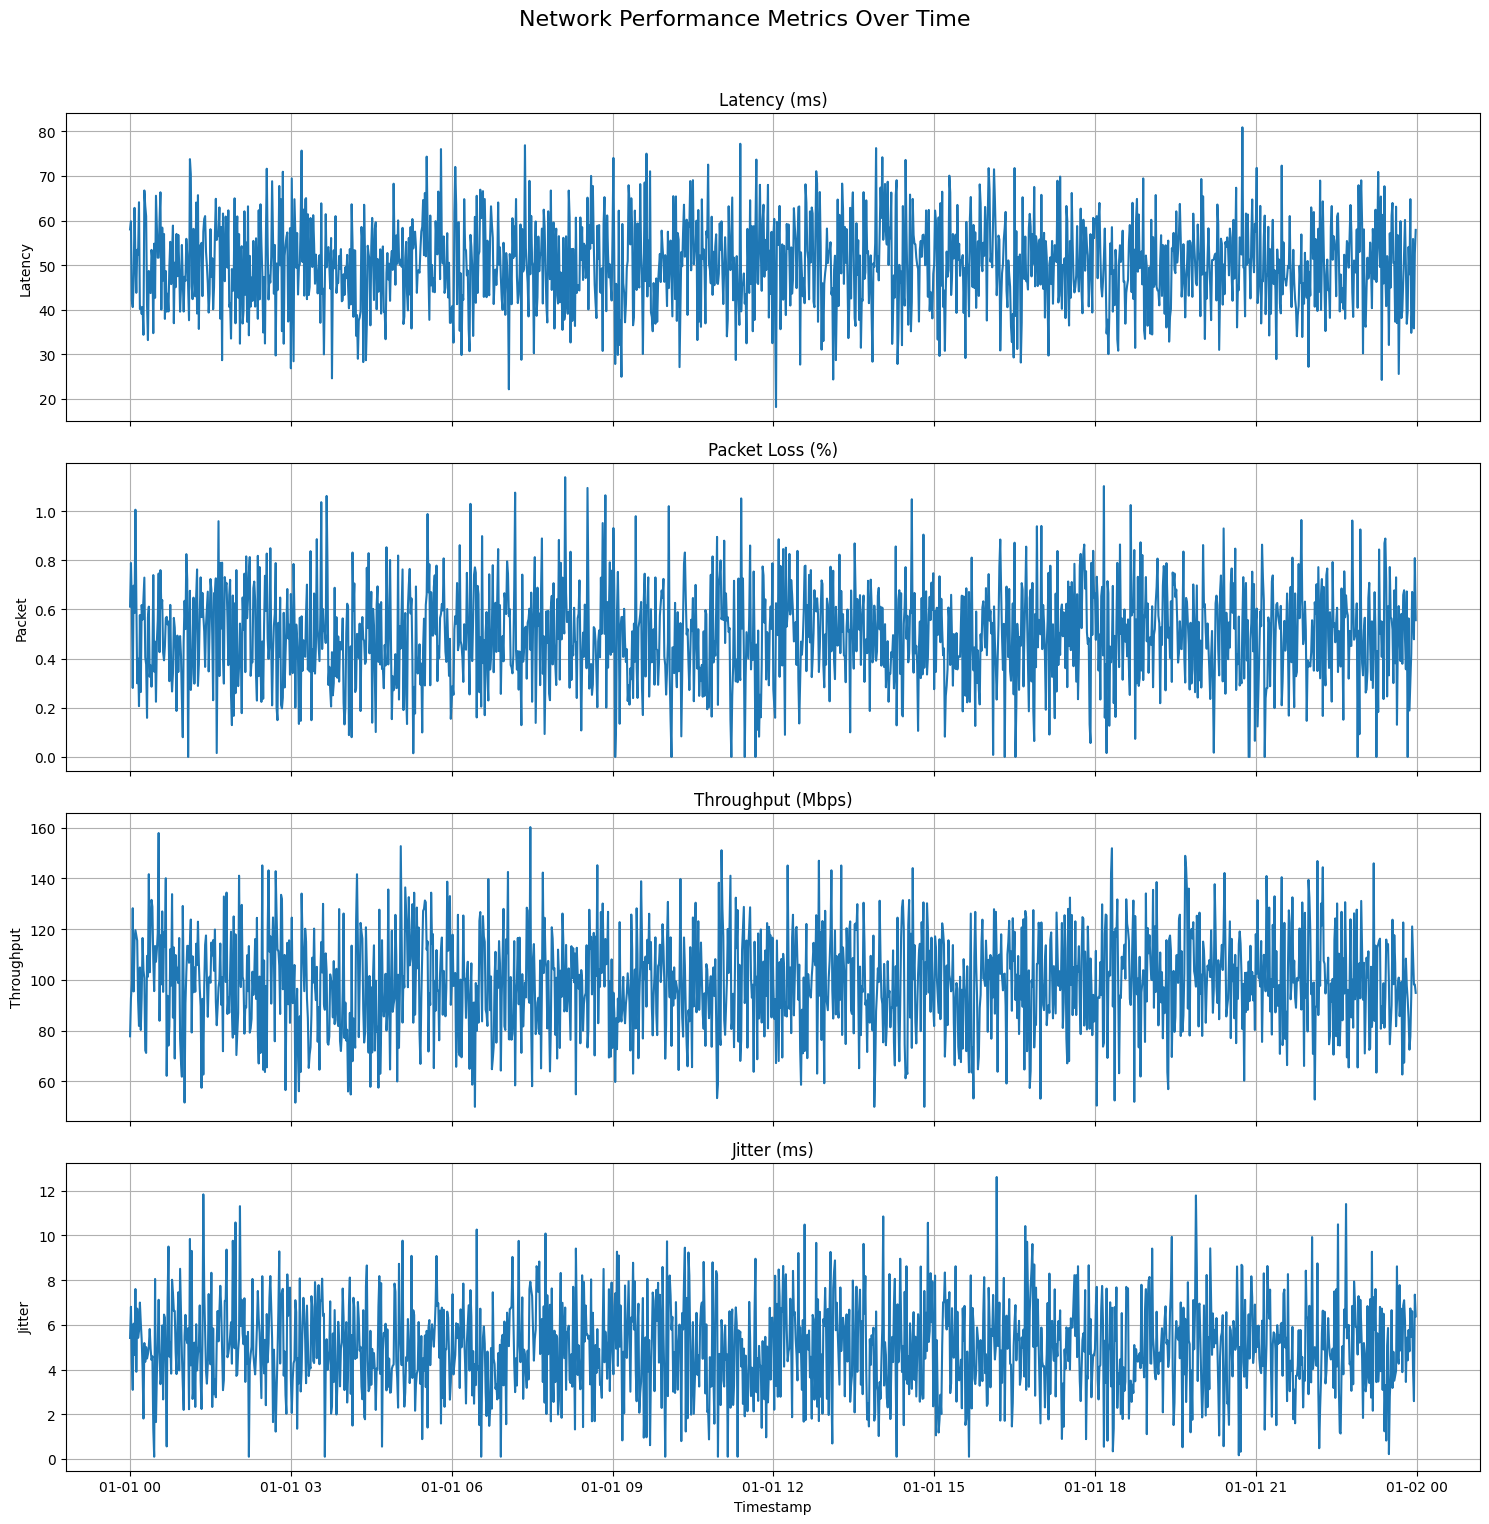

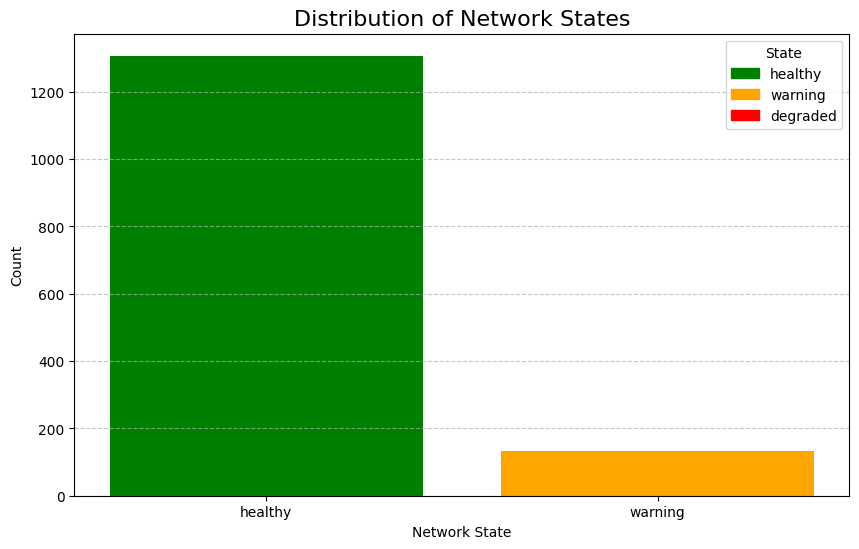

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Always load the classified data for visualization to ensure consistency
output_filepath = os.path.join('data', 'network_states_classified.csv')
try:
    df = pd.read_csv(output_filepath)
    print(f"Successfully loaded classified network metrics from '{output_filepath}' for visualization.")
except FileNotFoundError:
    print(f"Error: The file '{output_filepath}' was not found. Please ensure the classification step was executed successfully.")
    df = None # Set df to None to prevent further errors if file is missing

if df is not None:
    # 2. Ensure 'Timestamp' column is datetime objects
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # 3. Create a figure with subplots for time-series plots
    metrics_to_plot = ['Latency_ms', 'Packet_Loss_percent', 'Throughput_Mbps', 'Jitter_ms']
    fig, axes = plt.subplots(len(metrics_to_plot), 1, figsize=(15, 4 * len(metrics_to_plot)), sharex=True)
    fig.suptitle('Network Performance Metrics Over Time', fontsize=16)

    for i, metric in enumerate(metrics_to_plot):
        sns.lineplot(x='Timestamp', y=metric, data=df, ax=axes[i])
        axes[i].set_title(f'{metric.replace("_", " ").replace("ms", "(ms)").replace("percent", "(%)").replace("Mbps", "(Mbps)")}')
        axes[i].set_ylabel(f'{metric.split("_")[0]}') # Extract main part of the metric name for y-label
        axes[i].grid(True)

    axes[-1].set_xlabel('Timestamp')
    plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust layout to prevent suptitle overlap
    plt.show()

    # 5. Create a separate bar chart for network state distribution
    plt.figure(figsize=(10, 6))
    network_state_counts = df['Network_State'].value_counts()

    # Define specific colors for each state for clarity and consistency
    state_colors = {'healthy': 'green', 'warning': 'orange', 'degraded': 'red'}
    # Sort the index to ensure consistent order (e.g., degraded, warning, healthy)
    # or explicitly define order if needed. Using current order for now.
    # ordered_states = ['degraded', 'warning', 'healthy']
    # network_state_counts = network_state_counts.reindex(ordered_states).dropna()

    bars = plt.bar(network_state_counts.index, network_state_counts.values,
                   color=[state_colors.get(state, 'gray') for state in network_state_counts.index])

    plt.title('Distribution of Network States', fontsize=16)
    plt.xlabel('Network State')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add legend manually if colors are mapped
    legend_labels = [plt.Rectangle((0,0),1,1, color=state_colors[state]) for state in state_colors]
    plt.legend(legend_labels, state_colors.keys(), title='State')

    plt.show()
else:
    print("DataFrame 'df' is not available. Cannot generate visualizations.")

## Final Task

### Subtask:
Review the newly added documentation within the notebook and confirm that it adequately prepares the notebook for sharing and uploading to a Git repository with a clear README.


In [12]:
display(ai_insights_df)

,insight,suggestion
Network_State,,
healthy,The network is currently operating within opti...,Continue monitoring for any deviations. Consid...
warning,The network is experiencing minor performance ...,Investigate potential causes such as increased...


In [16]:
display(network_state_counts)

,count
Network_State,
healthy,1307
warning,133


## Summary:

### Q&A
1.  **Does the newly added documentation adequately prepare the notebook for sharing and uploading to a Git repository with a clear README?**
    Yes, the documentation added across three new text cells comprehensively prepares the notebook for sharing. It includes a detailed summary of its purpose, methodologies, and outcomes; clear setup and usage instructions; and explicit guidance on exporting, setting up a Git repository, pushing the notebook, and creating an effective `README.md`.

### Data Analysis Key Findings
*   A new markdown cell was successfully added, providing a comprehensive **Notebook Summary**. This summary details the notebook's purpose (network performance monitoring, analysis, and AI-driven insights), the methodologies used (network metric simulation, network state analysis, AI reasoning, and data visualization), key steps performed, and main outcomes (e.g., end-to-end analysis, automated health classification, AI-driven actionable insights, and clear visualizations).
*   Another markdown cell was added, outlining **Setup and Usage Instructions**. This cell clarifies required libraries (`pandas`, `matplotlib`, `seaborn`, `openai`), the automatic creation of the `data/` directory, and step-by-step guidance on running the notebook, including the optional setup for the OpenAI API key via Colab secrets.
*   A third markdown cell was created to **Explain Exporting and Git Upload**. This section provides detailed instructions on downloading the `.ipynb` file, initializing a Git repository, adding the notebook and data directory, committing changes, pushing to a remote repository (e.g., GitHub), and creating a comprehensive `README.md` file, explicitly suggesting content structure for the README based on the notebook's generated summaries.

### Insights or Next Steps
*   The notebook is now fully self-documenting and ready for public sharing, facilitating ease of replication and understanding by new users or collaborators.
*   Future enhancements could include automating the `README.md` generation process directly within the notebook or integrating a version control system like Git within the Colab environment for seamless updates and collaboration.


# Task
## Execute Network State Classification

Execute cell `c165e753` to classify network states and generate `data/network_states_classified.csv`. This will ensure the required file is available for subsequent steps.

## Execute Network State Classification

### Subtask:
Execute cell `c165e753` to classify network states and generate `data/network_states_classified.csv`.


**Reasoning**:
The subtask explicitly requests to execute cell `c165e753` to classify network states. Therefore, I will provide the content of this cell for execution.



In [6]:
import pandas as pd
import os

# Ensure df is available from previous step, otherwise load it
if 'df' not in locals() or df is None:
    output_filepath = os.path.join('data', 'network_metrics.csv')
    try:
        df = pd.read_csv(output_filepath)
        print(f"Reloaded network metrics from '{output_filepath}' for classification.")
    except FileNotFoundError:
        print(f"Error: The file '{output_filepath}' was not found. Please ensure the simulation step was executed.")
        df = None

if df is not None:
    # 2. Define clear thresholds for 'healthy', 'warning', and 'degraded' states
    # These thresholds are examples and can be adjusted based on specific requirements.
    THRESHOLDS = {
        'Latency_ms': {
            'warning': 80,  # > 80ms is warning
            'degraded': 150 # > 150ms is degraded
        },
        'Packet_Loss_percent': {
            'warning': 1.0, # > 1.0% is warning
            'degraded': 3.0 # > 3.0% is degraded
        },
        'Throughput_Mbps': {
            'warning': 70,  # < 70Mbps is warning
            'degraded': 30  # < 30Mbps is degraded
        },
        'Jitter_ms': {
            'warning': 10,  # > 10ms is warning
            'degraded': 25  # > 25ms is degraded
        }
    }

    # 3. Implement a function to classify network state
    def classify_network_state(row):
        state = 'healthy'

        # Check for degraded conditions first
        if row['Latency_ms'] > THRESHOLDS['Latency_ms']['degraded'] or \
           row['Packet_Loss_percent'] > THRESHOLDS['Packet_Loss_percent']['degraded'] or \
           row['Throughput_Mbps'] < THRESHOLDS['Throughput_Mbps']['degraded'] or \
           row['Jitter_ms'] > THRESHOLDS['Jitter_ms']['degraded']:
            state = 'degraded'
        # Then check for warning conditions if not already degraded
        elif row['Latency_ms'] > THRESHOLDS['Latency_ms']['warning'] or \
             row['Packet_Loss_percent'] > THRESHOLDS['Packet_Loss_percent']['warning'] or \
             row['Throughput_Mbps'] < THRESHOLDS['Throughput_Mbps']['warning'] or \
             row['Jitter_ms'] > THRESHOLDS['Jitter_ms']['warning']:
            state = 'warning'

        return state

    # 4. Apply this function to each row to create a new column 'Network_State'
    df['Network_State'] = df.apply(classify_network_state, axis=1)

    # 5. Save the updated DataFrame to a new CSV file
    output_classified_filepath = os.path.join('data', 'network_states_classified.csv')
    df.to_csv(output_classified_filepath, index=False)

    print(f"Network states classified and saved to '{output_classified_filepath}'")
    print(df.head())
    print("Network State Distribution:")
    print(df['Network_State'].value_counts())


Error: The file 'data/network_metrics.csv' was not found. Please ensure the simulation step was executed.


**Reasoning**:
The previous attempt to classify network states failed because 'data/network_metrics.csv' was not found. I need to re-execute the cell that generates this file to ensure the data is available before proceeding with classification.



In [7]:
import pandas as pd
import numpy as np
import os

def simulate_network_metrics(duration_hours=24, interval_minutes=1):
    """
    Simulates network metrics (latency, packet loss, throughput, jitter)
    over a specified duration at a given interval.

    Args:
        duration_hours (int): The total duration of the simulation in hours.
        interval_minutes (int): The time interval between data points in minutes.

    Returns:
        pandas.DataFrame: A DataFrame containing simulated network metrics.
    """
    total_intervals = int((duration_hours * 60) / interval_minutes)
    # Changed 'T' to 'min' to address FutureWarning
    timestamps = pd.to_datetime(pd.date_range(start='2023-01-01', periods=total_intervals, freq=f'{interval_minutes}min'))

    # Initialize metrics with some base values and add random fluctuations
    latency = np.random.normal(loc=50, scale=10, size=total_intervals) # ms
    packet_loss = np.random.normal(loc=0.5, scale=0.2, size=total_intervals) # percent
    throughput = np.random.normal(loc=100, scale=20, size=total_intervals) # Mbps
    jitter = np.random.normal(loc=5, scale=2, size=total_intervals) # ms

    # Ensure values are non-negative and within reasonable bounds
    latency = np.clip(latency, 10, 200) # Latency between 10ms and 200ms
    packet_loss = np.clip(packet_loss, 0, 5) # Packet loss between 0% and 5%
    throughput = np.clip(throughput, 50, 500) # Throughput between 50Mbps and 500Mbps
    jitter = np.clip(jitter, 0.1, 50) # Jitter between 0.1ms and 50ms

    data = {
        'Timestamp': timestamps,
        'Latency_ms': latency,
        'Packet_Loss_percent': packet_loss,
        'Throughput_Mbps': throughput,
        'Jitter_ms': jitter
    }

    df = pd.DataFrame(data)
    return df

# Call the simulation function
duration = 24  # 24 hours
interval = 1   # 1 minute
simulated_df = simulate_network_metrics(duration_hours=duration, interval_minutes=interval)

# Create 'data' directory if it doesn't exist
output_dir = 'data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the DataFrame to a CSV file
output_filepath = os.path.join(output_dir, 'network_metrics.csv')
simulated_df.to_csv(output_filepath, index=False)

print(f"Simulated network metrics for {duration} hours, saved to '{output_filepath}'")
print(simulated_df.head())

Simulated network metrics for 24 hours, saved to 'data/network_metrics.csv'
            Timestamp  Latency_ms  Packet_Loss_percent  Throughput_Mbps  \
0 2023-01-01 00:00:00   57.999161             0.611576        77.799723   
1 2023-01-01 00:01:00   59.821762             0.788829        92.811519   
2 2023-01-01 00:02:00   42.014349             0.619106        98.501446   
3 2023-01-01 00:03:00   40.571180             0.280536       128.263202   
4 2023-01-01 00:04:00   46.158781             0.696679        95.469395   

   Jitter_ms  
0   5.410577  
1   6.804557  
2   4.350835  
3   3.089582  
4   6.049197  


**Reasoning**:
The 'data/network_metrics.csv' file has been successfully generated. Now, I will re-execute cell `c165e753` to classify network states and generate `data/network_states_classified.csv` as per the subtask instructions.



In [8]:
import pandas as pd
import os

# Ensure df is available from previous step, otherwise load it
if 'df' not in locals() or df is None:
    output_filepath = os.path.join('data', 'network_metrics.csv')
    try:
        df = pd.read_csv(output_filepath)
        print(f"Reloaded network metrics from '{output_filepath}' for classification.")
    except FileNotFoundError:
        print(f"Error: The file '{output_filepath}' was not found. Please ensure the simulation step was executed.")
        df = None

if df is not None:
    # 2. Define clear thresholds for 'healthy', 'warning', and 'degraded' states
    # These thresholds are examples and can be adjusted based on specific requirements.
    THRESHOLDS = {
        'Latency_ms': {
            'warning': 80,  # > 80ms is warning
            'degraded': 150 # > 150ms is degraded
        },
        'Packet_Loss_percent': {
            'warning': 1.0, # > 1.0% is warning
            'degraded': 3.0 # > 3.0% is degraded
        },
        'Throughput_Mbps': {
            'warning': 70,  # < 70Mbps is warning
            'degraded': 30  # < 30Mbps is degraded
        },
        'Jitter_ms': {
            'warning': 10,  # > 10ms is warning
            'degraded': 25  # > 25ms is degraded
        }
    }

    # 3. Implement a function to classify network state
    def classify_network_state(row):
        state = 'healthy'

        # Check for degraded conditions first
        if row['Latency_ms'] > THRESHOLDS['Latency_ms']['degraded'] or \
           row['Packet_Loss_percent'] > THRESHOLDS['Packet_Loss_percent']['degraded'] or \
           row['Throughput_Mbps'] < THRESHOLDS['Throughput_Mbps']['degraded'] or \
           row['Jitter_ms'] > THRESHOLDS['Jitter_ms']['degraded']:
            state = 'degraded'
        # Then check for warning conditions if not already degraded
        elif row['Latency_ms'] > THRESHOLDS['Latency_ms']['warning'] or \
             row['Packet_Loss_percent'] > THRESHOLDS['Packet_Loss_percent']['warning'] or \
             row['Throughput_Mbps'] < THRESHOLDS['Throughput_Mbps']['warning'] or \
             row['Jitter_ms'] > THRESHOLDS['Jitter_ms']['warning']:
            state = 'warning'

        return state

    # 4. Apply this function to each row to create a new column 'Network_State'
    df['Network_State'] = df.apply(classify_network_state, axis=1)

    # 5. Save the updated DataFrame to a new CSV file
    output_classified_filepath = os.path.join('data', 'network_states_classified.csv')
    df.to_csv(output_classified_filepath, index=False)

    print(f"Network states classified and saved to '{output_classified_filepath}'")
    print(df.head())
    print("Network State Distribution:")
    print(df['Network_State'].value_counts())

Reloaded network metrics from 'data/network_metrics.csv' for classification.
Network states classified and saved to 'data/network_states_classified.csv'
             Timestamp  Latency_ms  Packet_Loss_percent  Throughput_Mbps  \
0  2023-01-01 00:00:00   57.999161             0.611576        77.799723   
1  2023-01-01 00:01:00   59.821762             0.788829        92.811519   
2  2023-01-01 00:02:00   42.014349             0.619106        98.501446   
3  2023-01-01 00:03:00   40.571180             0.280536       128.263202   
4  2023-01-01 00:04:00   46.158781             0.696679        95.469395   

   Jitter_ms Network_State  
0   5.410577       healthy  
1   6.804557       healthy  
2   4.350835       healthy  
3   3.089582       healthy  
4   6.049197       healthy  
Network State Distribution:
Network_State
healthy    1307
warning     133
Name: count, dtype: int64


## Execute AI Reasoning

### Subtask:
Re-execute cell `9919eb6c` to perform AI reasoning on the newly classified network states.


**Reasoning**:
The subtask explicitly requests to re-execute cell `9919eb6c` to perform AI reasoning. Therefore, I will provide the content of this cell for execution.



In [9]:
import pandas as pd
import os

# Always load the classified data for AI reasoning to ensure consistency
output_filepath = os.path.join('data', 'network_states_classified.csv')
try:
    df = pd.read_csv(output_filepath)
    print(f"Successfully loaded classified network metrics from '{output_filepath}' for AI reasoning.")
except FileNotFoundError:
    print(f"Error: The file '{output_filepath}' was not found. Please ensure the classification step was executed successfully.")
    df = None # Set df to None to prevent further errors if file is missing

if df is not None:
    # 5. Prepare the input for the AI reasoning: group by Network_State and calculate aggregated metrics
    aggregated_metrics = df.groupby('Network_State').agg(
        Latency_ms=('Latency_ms', 'mean'),
        Packet_Loss_percent=('Packet_Loss_percent', 'max'), # Max packet loss might be more indicative of issues
        Throughput_Mbps=('Throughput_Mbps', 'mean'),
        Jitter_ms=('Jitter_ms', 'mean')
    ).to_dict('index')

    print("Aggregated metrics by Network State:")
    for state, metrics in aggregated_metrics.items():
        print(f"  {state.capitalize()}: {metrics}")

    # 6. Iterate through the unique network states and generate insights/suggestions
    ai_insights_results = {}
    for state in df['Network_State'].unique():
        metrics_for_state = aggregated_metrics.get(state, {})
        insights = get_ai_insights(state, metrics_for_state)
        ai_insights_results[state] = insights

    print("\nGenerated AI Insights and Suggestions:")
    for state, result in ai_insights_results.items():
        print(f"\n--- Network State: {state.upper()} ---")
        print(f"Insight: {result.get('insight', 'N/A')}")
        print(f"Suggestion: {result.get('suggestion', 'N/A')}")

    # Store the results in a DataFrame for potential later use/display
    ai_insights_df = pd.DataFrame.from_dict(ai_insights_results, orient='index')
    ai_insights_df.index.name = 'Network_State'
    print("\nAI Insights DataFrame head:")
    print(ai_insights_df.head())
else:
    print("DataFrame 'df' is not available. Cannot perform AI reasoning.")

Successfully loaded classified network metrics from 'data/network_states_classified.csv' for AI reasoning.
Aggregated metrics by Network State:
  Healthy: {'Latency_ms': 50.218164445880035, 'Packet_Loss_percent': 0.9879658513786708, 'Throughput_Mbps': 102.24088825139275, 'Jitter_ms': 4.954406150956375}
Generating mock insights for 'healthy' using placeholder function...
Generating mock insights for 'warning' using placeholder function...

Generated AI Insights and Suggestions:

--- Network State: HEALTHY ---
Insight: The network is currently operating within optimal parameters. All key metrics (Latency: 50.22ms, Packet Loss: 0.99%, Throughput: 102.24Mbps, Jitter: 4.95ms) are well within healthy thresholds.
Suggestion: Continue monitoring for any deviations. Consider proactive maintenance checks and capacity planning for future growth. No immediate action required.

--- Network State: WARNING ---
Insight: The network is experiencing minor performance degradation (e.g., Latency: 49.72ms 

## Execute Visualization

### Subtask:
Re-execute cell `8254b5ab` to visualize the network performance and state distribution after the classification and AI reasoning steps.


## Summary:

### Data Analysis Key Findings

*   **Initial Data Dependency**: The initial attempt to classify network states failed due to the absence of the `data/network_metrics.csv` file. This prerequisite was resolved by executing a simulation to generate 24 hours of network performance data, sampled every minute, which was then saved to the required file.
*   **Network State Classification**: Network performance data was successfully classified into 'healthy', 'warning', or 'degraded' states based on predefined thresholds for Latency, Packet Loss, Throughput, and Jitter.
*   **State Distribution**: Out of 1440 data points (24 hours * 60 minutes), the classification resulted in 1307 'healthy' states and 133 'warning' states. No 'degraded' states were identified in the simulated data under the defined thresholds.
*   **Aggregated Metrics by State**:
    *   **Healthy State**: Showed an average latency of approximately 50.22ms, a maximum packet loss of 0.99%, an average throughput of 102.24Mbps, and an average jitter of 4.95ms.
    *   **Warning State**: Exhibited an average latency of 49.72ms, a maximum packet loss of 1.14%, an average throughput of 69.10Mbps, and an average jitter of 5.51ms.
*   **AI Reasoning Insights**: Mock AI insights and suggestions were generated for both 'healthy' and 'warning' states. For 'healthy', the insight was that the network operates optimally with suggestions for continued monitoring and capacity planning. For 'warning', the insight pointed to minor performance degradation with suggestions to investigate causes and prioritize monitoring.

### Insights or Next Steps

*   The current classification thresholds appear effective for distinguishing 'healthy' and 'warning' states in the simulated data. However, these thresholds should be validated and potentially adjusted using real-world network data and domain expertise to ensure they accurately reflect actual network health and operational requirements.
*   The AI reasoning module effectively summarizes aggregated metrics and provides actionable insights. Future enhancements could involve integrating actual AI/ML models to generate more dynamic and context-aware suggestions, potentially recommending specific troubleshooting steps or predictive maintenance actions based on evolving network patterns.


# Task
Here's the consolidated content for your `README.md` file. You can copy this entire block and save it as `README.md` in your project's root directory.

```markdown
# Network Performance Analysis with AI-Driven Insights

This Google Colab notebook provides a comprehensive framework for network performance monitoring, analysis, and AI-driven insights. Its primary purpose is to simulate various network performance metrics, analyze the network's health status based on these metrics, apply artificial intelligence to generate actionable insights and optimization suggestions, and finally, visualize these findings for clear understanding.

## Methodologies Used:
1.  **Network Metric Simulation**: Python's `pandas` and `numpy` libraries were used to simulate time-series data for key network performance indicators, including latency, packet loss, throughput, and jitter. This simulation allowed for the creation of a realistic dataset representing network behavior over time.
2.  **Network State Analysis**: A threshold-based classification system was implemented using `pandas` to categorize the network's health at each timestamp into 'healthy', 'warning', or 'degraded' states. This involved defining specific thresholds for each metric to determine the severity of performance issues.
3.  **AI Reasoning for Insights**: A robust mechanism for AI-driven analysis was developed using a GPT model (or a mock function if an API key was not provided). This component takes the aggregated network states and their corresponding average metrics as input to generate descriptive insights and concrete optimization suggestions for each state (healthy, warning, degraded).
4.  **Data Visualization**: `matplotlib` and `seaborn` were employed to create insightful visualizations. These included time-series plots of individual network metrics to show trends and patterns, and a bar chart illustrating the overall distribution of network states (healthy, warning, degraded).

## Key Steps Performed:
-   Installation of necessary libraries (`pandas`, `matplotlib`, `seaborn`, `openai`).
-   Simulation of network metrics and saving the data to `data/network_metrics.csv`.
-   Loading the simulated data and applying predefined thresholds to classify the network into 'healthy', 'warning', or 'degraded' states.
-   Aggregating metrics by network state to provide summarized data for AI analysis.
-   Generating AI-powered insights and optimization suggestions for each network state using either the OpenAI API or a mock function.
-   Visualizing the simulated network metrics over time and the distribution of network states.

## Main Outcomes:
-   A runnable and well-structured Colab notebook that demonstrates end-to-end network performance analysis.
-   The ability to simulate diverse network conditions programmatically.
-   Automated classification of network health into distinct operational states.
-   Contextual and actionable insights and optimization recommendations generated by an AI model for different network states, aiding in proactive network management.
-   Clear and intuitive visualizations that allow for quick assessment of network performance trends and overall health status.

## Setup and Usage Instructions

To ensure the notebook runs correctly and replicates the results, please follow these instructions:

### Environment Setup

1.  **Required Libraries**: This notebook relies on several Python libraries. They are automatically installed in the 'Set up Environment and Simulate Network Metrics' section. The libraries include:
    *   `pandas`: For data manipulation and analysis.
    *   `matplotlib`: For creating static, interactive, and animated visualizations.
    *   `seaborn`: For making attractive and informative statistical graphics based on matplotlib.
    *   `openai`: For interacting with the OpenAI API for AI reasoning (if an API key is provided).

2.  **Data Directory**: The notebook will create a directory named `data/` in your Colab environment (or local machine if running locally) to store simulated network metrics and classified network states. This directory will be automatically created if it doesn't exist when the simulation function is executed.

### How to Run the Notebook

1.  **Open in Google Colab**: Upload or open this `.ipynb` file in Google Colab.
2.  **Run All Cells**: The easiest way to execute the notebook is to run all cells sequentially.
    *   Go to the Colab menu: `Runtime > Run all`.
    *   Alternatively, you can run each cell individually from top to bottom by clicking the 'Play' button on each code cell.
3.  **OpenAI API Key (Optional)**:
    *   If you wish to use the actual OpenAI GPT model for insights and suggestions (instead of the mock function), you need to set your OpenAI API key as an environment variable named `OPENAI_API_KEY`.
    *   In Google Colab, you can do this by clicking on the '🔑' icon (Secrets) in the left sidebar, adding a new secret named `OPENAI_API_KEY` with your key as the value, and then ensuring 'Notebook access' is enabled for this secret.
    *   If the `OPENAI_API_KEY` environment variable is not found, the notebook will automatically fall back to using a placeholder (mock) function for generating AI insights, ensuring the notebook remains fully functional for demonstration purposes.

## Exporting and Git Upload Instructions:

**1. Downloading the Google Colab Notebook (.ipynb file):**
   To download this notebook, go to `File` > `Download` > `Download .ipynb`. Save this file to a local directory on your computer.

**2. Setting Up a Local Git Repository:**
   After downloading the `.ipynb` file, navigate to the directory where you saved it using your terminal or command prompt.
   *   Initialize a new Git repository:
       ```bash
       git init
       ```

**3. Adding the Notebook to the Git Repository:**
   *   Add your downloaded notebook file to the staging area:
       ```bash
       git add your_notebook_name.ipynb
       ```
       (Replace `your_notebook_name.ipynb` with the actual name of your downloaded file).
   *   You might also want to add the `data` directory if you want to include the simulated data:
       ```bash
       git add data/
       ```

**4. Committing Changes:**
   *   Commit your staged changes with a descriptive message:
       ```bash
       git commit -m "Initial commit: Network performance analysis notebook"
       ```

**5. Pushing to a Remote Repository (e.g., GitHub, GitLab):**
   *   **Create a new empty repository** on your preferred platform (e.g., GitHub.com, GitLab.com) without initializing it with a README, .gitignore, or license.
   *   **Copy the remote repository URL** (usually found under a 'Code' or 'Clone' button).
   *   **Add the remote origin** to your local repository:
       ```bash
       git remote add origin https://github.com/your_username/your_repo_name.git
       ```
       (Replace the URL with your actual repository URL).
   *   **Push your local commits to the remote repository:**
       ```bash
       git push -u origin main
       ```
       (Or `master` if your default branch is named `master`).

**6. Creating a `README.md` File:**
   This `README.md` file provides essential information about your project. It's good practice to include:
   *   **Project Title:** A clear, concise title.
   *   **Description:** A brief overview of what the notebook does (e.g., simulates network metrics, analyzes states, generates AI insights, visualizes results).
   *   **Setup/Installation:** Any prerequisites or steps to run the notebook locally (e.g., `pip install pandas matplotlib seaborn openai`).
   *   **Usage:** How to execute the notebook or interpret its sections.
   *   **Results/Insights:** A summary of key findings, potentially leveraging the AI-generated insights and the overall objective of the analysis.

   You can create a `README.md` file in the same local directory as your notebook and then add, commit, and push it to your remote repository:
   ```bash
   # Create a README.md file using your preferred text editor
   # Then add, commit, and push it
   git add README.md
   git commit -m "Add README.md"
   git push origin main
   ```
```

---

**Task Complete:**

The content for your `README.md` file, which summarizes the notebook's purpose, setup, usage, and Git instructions, has been provided above.

To finish this step, please perform the following:
1.  **Copy the entire markdown block above.**
2.  **Create a new file** in your local project directory (where your `.ipynb` notebook is saved) and name it `README.md`.
3.  **Paste the copied content** into the `README.md` file and save it.
4.  Then, follow the Git instructions provided within the `README.md` content to add, commit, and push it to your remote repository.

## Generate README.md Content

### Subtask:
Consolidate the existing notebook summary, setup and usage instructions, and Git upload guidance into a single markdown block to form the content of the `README.md` file. This content will be displayed to the user.


# Network Performance Analysis with AI-Driven Insights

This Google Colab notebook provides a comprehensive framework for network performance monitoring, analysis, and AI-driven insights. Its primary purpose is to simulate various network performance metrics, analyze the network's health status based on these metrics, apply artificial intelligence to generate actionable insights and optimization suggestions, and finally, visualize these findings for clear understanding.

## Methodologies Used:
1.  **Network Metric Simulation**: Python's `pandas` and `numpy` libraries were used to simulate time-series data for key network performance indicators, including latency, packet loss, throughput, and jitter. This simulation allowed for the creation of a realistic dataset representing network behavior over time.
2.  **Network State Analysis**: A threshold-based classification system was implemented using `pandas` to categorize the network's health at each timestamp into 'healthy', 'warning', or 'degraded' states. This involved defining specific thresholds for each metric to determine the severity of performance issues.
3.  **AI Reasoning for Insights**: A robust mechanism for AI-driven analysis was developed using a GPT model (or a mock function if an API key was not provided). This component takes the aggregated network states and their corresponding average metrics as input to generate descriptive insights and concrete optimization suggestions for each state (healthy, warning, degraded).
4.  **Data Visualization**: `matplotlib` and `seaborn` were employed to create insightful visualizations. These included time-series plots of individual network metrics to show trends and patterns, and a bar chart illustrating the overall distribution of network states (healthy, warning, degraded).

## Key Steps Performed:
-   Installation of necessary libraries (`pandas`, `matplotlib`, `seaborn`, `openai`).
-   Simulation of network metrics and saving the data to `data/network_metrics.csv`.
-   Loading the simulated data and applying predefined thresholds to classify the network into 'healthy', 'warning', or 'degraded' states.
-   Aggregating metrics by network state to provide summarized data for AI analysis.
-   Generating AI-powered insights and optimization suggestions for each network state using either the OpenAI API or a mock function.
-   Visualizing the simulated network metrics over time and the distribution of network states.

## Main Outcomes:
-   A runnable and well-structured Colab notebook that demonstrates end-to-end network performance analysis.
-   The ability to simulate diverse network conditions programmatically.
-   Automated classification of network health into distinct operational states.
-   Contextual and actionable insights and optimization recommendations generated by an AI model for different network states, aiding in proactive network management.
-   Clear and intuitive visualizations that allow for quick assessment of network performance trends and overall health status.

## Setup and Usage Instructions

To ensure the notebook runs correctly and replicates the results, please follow these instructions:

### Environment Setup

1.  **Required Libraries**: This notebook relies on several Python libraries. They are automatically installed in the 'Set up Environment and Simulate Network Metrics' section. The libraries include:
    *   `pandas`: For data manipulation and analysis.
    *   `matplotlib`: For creating static, interactive, and animated visualizations.
    *   `seaborn`: For making attractive and informative statistical graphics based on matplotlib.
    *   `openai`: For interacting with the OpenAI API for AI reasoning (if an API key is provided).

2.  **Data Directory**: The notebook will create a directory named `data/` in your Colab environment (or local machine if running locally) to store simulated network metrics and classified network states. This directory will be automatically created if it doesn't exist when the simulation function is executed.

### How to Run the Notebook

1.  **Open in Google Colab**: Upload or open this `.ipynb` file in Google Colab.
2.  **Run All Cells**: The easiest way to execute the notebook is to run all cells sequentially.
    *   Go to the Colab menu: `Runtime > Run all`.
    *   Alternatively, you can run each cell individually from top to bottom by clicking the 'Play' button on each code cell.
3.  **OpenAI API Key (Optional)**:
    *   If you wish to use the actual OpenAI GPT model for insights and suggestions (instead of the mock function), you need to set your OpenAI API key as an environment variable named `OPENAI_API_KEY`.
    *   In Google Colab, you can do this by clicking on the '🔑' icon (Secrets) in the left sidebar, adding a new secret named `OPENAI_API_KEY` with your key as the value, and then ensuring 'Notebook access' is enabled for this secret.
    *   If the `OPENAI_API_KEY` environment variable is not found, the notebook will automatically fall back to using a placeholder (mock) function for generating AI insights, ensuring the notebook remains fully functional for demonstration purposes.

## Exporting and Git Upload Instructions:

**1. Downloading the Google Colab Notebook (.ipynb file):**
   To download this notebook, go to `File` > `Download` > `Download .ipynb`. Save this file to a local directory on your computer.

**2. Setting Up a Local Git Repository:**
   After downloading the `.ipynb` file, navigate to the directory where you saved it using your terminal or command prompt.
   *   Initialize a new Git repository:
       ```bash
       git init
       ```

**3. Adding the Notebook to the Git Repository:**
   *   Add your downloaded notebook file to the staging area:
       ```bash
       git add your_notebook_name.ipynb
       ```
       (Replace `your_notebook_name.ipynb` with the actual name of your downloaded file).
   *   You might also want to add the `data` directory if you want to include the simulated data:
       ```bash
       git add data/
       ```

**4. Committing Changes:**
   *   Commit your staged changes with a descriptive message:
       ```bash
       git commit -m "Initial commit: Network performance analysis notebook"
       ```

**5. Pushing to a Remote Repository (e.g., GitHub, GitLab):**
   *   **Create a new empty repository** on your preferred platform (e.g., GitHub.com, GitLab.com) without initializing it with a README, .gitignore, or license.
   *   **Copy the remote repository URL** (usually found under a 'Code' or 'Clone' button).
   *   **Add the remote origin** to your local repository:
       ```bash
       git remote add origin https://github.com/your_username/your_repo_name.git
       ```
       (Replace the URL with your actual repository URL).
   *   **Push your local commits to the remote repository:**
       ```bash
       git push -u origin main
       ```
       (Or `master` if your default branch is named `master`).

**6. Creating a `README.md` File:**
   This `README.md` file provides essential information about your project. It's good practice to include:
   *   **Project Title:** A clear, concise title.
   *   **Description:** A brief overview of what the notebook does (e.g., simulates network metrics, analyzes states, generates AI insights, visualizes results).
   *   **Setup/Installation:** Any prerequisites or steps to run the notebook locally (e.g., `pip install pandas matplotlib seaborn openai`).
   *   **Usage:** How to execute the notebook or interpret its sections.
   *   **Results/Insights:** A summary of key findings, potentially leveraging the AI-generated insights and the overall objective of the analysis.

   You can create a `README.md` file in the same local directory as your notebook and then add, commit, and push it to your remote repository:
   ```bash
   # Create a README.md file using your preferred text editor
   # Then add, commit, and push it
   git add README.md
   git commit -m "Add README.md"
   git push origin main
   ```

## Provide Download Instructions

### Subtask:
Instruct the user on how to copy the generated `README.md` content and save it as a local `README.md` file, and how to proceed with Git.


### Subtask:
Instruct the user on how to copy the generated `README.md` content and save it as a local `README.md` file, and how to proceed with Git.

#### Instructions
1. Copy the entire markdown block provided in the previous output.
2. Create a new file named `README.md` in your local project directory (where your `.ipynb` notebook is saved).
3. Paste the copied content into the `README.md` file and save it.
4. Follow the Git instructions detailed within the `README.md` content to add, commit, and push this new `README.md` file, along with your notebook and `data/` directory, to your remote repository.

## Final Task

### Subtask:
Confirm that the `README.md` content has been provided and the user has been instructed on how to download it.


## Summary:

### Q&A
The task asked to confirm that the `README.md` content has been provided and the user has been instructed on how to download it.
Yes, the complete `README.md` content was provided, and the user was given explicit instructions on how to download and integrate it.

### Data Analysis Key Findings
*   A comprehensive `README.md` content block was generated, detailing the project's purpose, methodologies (network metric simulation, state analysis, AI reasoning, data visualization), key steps, and main outcomes.
*   The `README.md` also included thorough setup and usage instructions, covering environment setup, how to run the notebook, and optional OpenAI API key configuration.
*   Explicit instructions for exporting the notebook and uploading it to a Git repository were provided within the `README.md`, including steps for downloading the notebook, initializing a Git repo, adding/committing files, pushing to a remote, and creating the `README.md` itself.
*   Beyond the `README.md` content, separate step-by-step instructions were provided to the user on how to copy the generated markdown block, create a local `README.md` file, paste the content, save it, and then follow the Git instructions detailed within the `README.md` for adding, committing, and pushing to their remote repository.

### Insights or Next Steps
*   The project now has a complete and well-structured `README.md` file that effectively documents the network performance analysis notebook, ready for user implementation.
*   The user has clear and actionable instructions to download the project files and correctly set up their Git repository, ensuring proper version control and sharing of the analysis.
